# Importing Liaberies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

# Connecting with MYSQL Server

db = mysql.connector.connect(host = "localhost",
                             username= "root",
                             password = "Kiwi@12345",
                             database = "ecommerce")


cur = db.cursor()
    

# List all unique cities where customers are located.


In [2]:
query = """select distinct(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [3]:
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [4]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [5]:
query = """ select upper(products.product_category) Category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by Category
"""

cur.execute(query)

data = cur.fetchall()

data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [6]:
df = pd.DataFrame(data ,columns =["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [7]:
query = """ select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100
from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0] 

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state. 

In [8]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

"Count the number of customers from each state", data[0][0] 

('Count the number of customers from each state', 'SP')

In [9]:
df=pd.DataFrame(data, columns= ["State", "Customer_count"])
df

,State,Customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


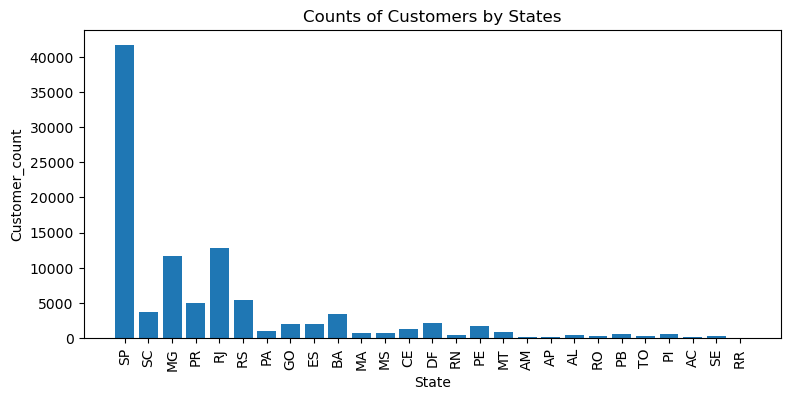

In [10]:
plt.figure(figsize =(9,4))
plt.bar(df["State"], df["Customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Customer_count")
plt.title("Counts of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

In [11]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months """

cur.execute(query)

data = cur.fetchall()
data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

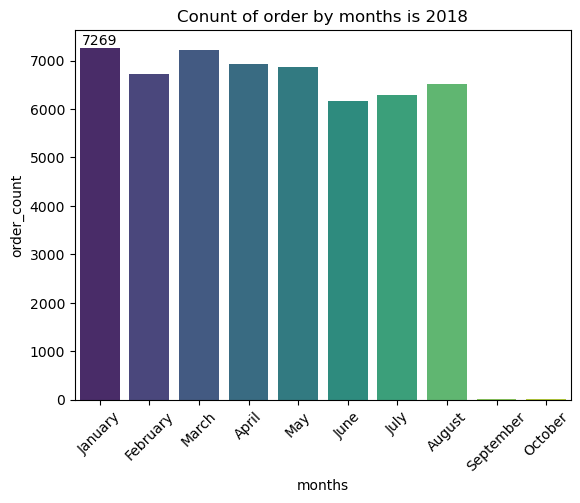

In [12]:
df = pd.DataFrame(data, columns = ["months", "order_count"])
o =["January", "February", "March", "April","May", "June", "July", "August", "September", "October"]

ax = sns.barplot(x= df["months"],y= df["order_count"], data = df, order = o, palette = "viridis")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Conunt of order by months is 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [13]:
query = """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()
data

[('sao paulo', Decimal('1.16')),
 ('sao jose dos campos', Decimal('1.14')),
 ('porto alegre', Decimal('1.17')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('campinas', Decimal('1.16')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('cacapava', Decimal('1.16')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),

In [14]:
df=pd.DataFrame(data, columns = ["customer city", "average orders/per_order"])
df.head(10)

,customer city,average orders/per_order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# Calculate the percentage of total revenue contributed by each product category.

In [17]:
query = """ select upper(products.product_category) category,
round((sum(payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category 
order by sales_percentage desc """

cur.execute(query)

data = cur.fetchall()
data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('CONSTRUCTION TOOLS ILLUMINATION',

In [19]:
df=pd.DataFrame(data, columns =["Category", "Percentage distribution"])
df

,Category,Percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [28]:
query = """ select products.product_category, count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()
data

[('HEALTH BEAUTY', 9670, 130.16),
 ('sport leisure', 8641, 114.34),
 ('Cool Stuff', 3796, 167.36),
 ('computer accessories', 7827, 116.51),
 ('Watches present', 5991, 201.14),
 ('housewares', 6964, 90.79),
 ('electronics', 2767, 57.91),
 (None, 1603, 112.0),
 ('toys', 4117, 117.55),
 ('bed table bath', 11115, 93.3),
 ('Games consoles', 1137, 138.49),
 ('automotive', 4235, 139.96),
 ('Furniture Decoration', 8334, 87.56),
 ('home appliances', 771, 103.98),
 ('telephony', 4545, 71.21),
 ('Construction Tools Construction', 929, 155.73),
 ('perfumery', 3419, 116.74),
 ('stationary store', 2517, 91.75),
 ('Room Furniture', 503, 137.01),
 ('Fashion Bags and Accessories', 2031, 75.25),
 ('Garden tools', 4347, 111.63),
 ('Fashion Underwear and Beach Fashion', 131, 72.84),
 ('pet Shop', 1947, 110.07),
 ('SIGNALIZATION AND SAFETY', 199, 108.09),
 ('ELECTRICES 2', 238, 476.12),
 ("Fashion Women's Clothing", 48, 58.41),
 ('Bags Accessories', 1092, 128.6),
 ('General Interest Books', 553, 84.73),
 (

In [32]:
df = pd.DataFrame(data, columns = ["category", "order_count","price"])
df

,category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [46]:
arr1 = df["order_count"]
arr2 = df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is", a[0][1])

the correlation between price and number of times a product has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [56]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as rn"""

cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.9073021412, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.0398402214, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.26976528764, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42012761533, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.0804977417, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31931465864, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.1209387779, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.30050226487, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.22986984253, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.20970630646, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.74904833734, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80002561212, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.7397725582, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91018915176, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.3400707245, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04013061523, 16),
 ('620c

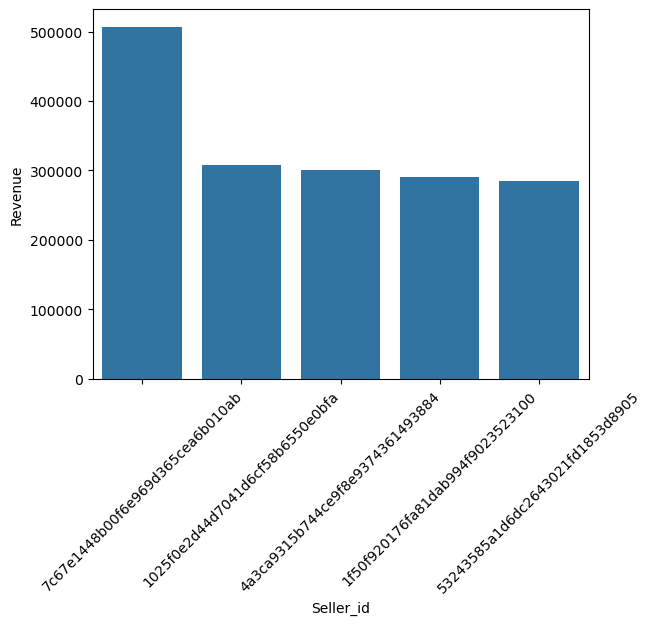

In [61]:
df=pd.DataFrame(data, columns =["Seller_id", "Revenue", "Rank"])
df=df.head()
sns.barplot(x= "Seller_id", y = "Revenue", data = df)
plt.xticks(rotation = 45)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [64]:
query = """ select customer_id, order_purchase_timestamp,
avg(payment) over(partition by customer_id 
order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c', '2017-09-17 16:04:44', 85.2300033569336),
 ('000598caf2ef4117407665ac33275130', '2018-08-11 12:14:35', 1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 09:46:53',
  147.3300018310547),
 ('00062b33cb9f6fe976afdcff967ea74d',
  '2017-03-15 23:44:09',
  58.950

In [69]:
df= pd.DataFrame(data, columns =["customer_id","order_purchase_timestamp","Avg_payment_value"])
df

,customer_id,order_purchase_timestamp,Avg_payment_value
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


# Calculate the cumulative sales per month for each year.

In [77]:
query = """ select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales
from

(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months)as a"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.340000000004),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.8399999999),
 (2017, 6, 511276.38, 2461605.2199999997),
 (2017, 7, 592382.92, 3053988.1399999997),
 (2017, 8, 674396.32, 3728384.4599999995),
 (2017, 9, 727762.45, 4456146.909999999),
 (2017, 10, 779677.88, 5235824.789999999),
 (2017, 11, 1194882.8, 6430707.589999999),
 (2017, 12, 878401.48, 7309109.069999998),
 (2018, 1, 1115004.18, 8424113.249999998),
 (2018, 2, 992463.34, 9416576.589999998),
 (2018, 3, 1159652.12, 10576228.709999997),
 (2018, 4, 1160785.48, 11737014.189999998),
 (2018, 5, 1153982.15, 12890996.339999998),
 (2018, 6, 1023880.5, 13914876.839999998),
 (2018, 7, 1066540.75, 14981417.589999998),
 (2018, 8, 1022425.32, 16003842.909999998),
 (2018, 9, 4439.54, 16008282.449999997),
 (2018, 10, 589.67, 16008872.11

In [79]:
df=pd.DataFrame(data,columns=["years","Months","payments", "Cumulative_sales"])
df

,years,Months,payments,Cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [91]:
query = """ with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years order by years)


select years, ((payment - lag(payment, 1) over(order by years))/ lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, None), (2017, 12112.703761340945), (2018, 20.00092381158259)]

In [92]:
df=pd.DataFrame(data, columns =["Years", "YoY % growth"])
df

,Years,YoY % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [100]:
 # since non of our customers are repeated that way the value is null

query = """ with a as(select customers.customer_id, min(orders.order_purchase_timestamp)first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),


b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order 
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id"""


cur.execute(query)
data = cur.fetchall()
data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

In [115]:
query = """select years, customer_id, payment, d_rank
from
 (select year(orders.order_purchase_timestamp) years,
 orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc)d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3"""


cur.execute(query)
data = cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]

In [117]:
df=pd.DataFrame(data,columns = ["years","customer_id","payment","d_rank"])
df

,years,customer_id,payment,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


<function matplotlib.pyplot.show(close=None, block=None)>

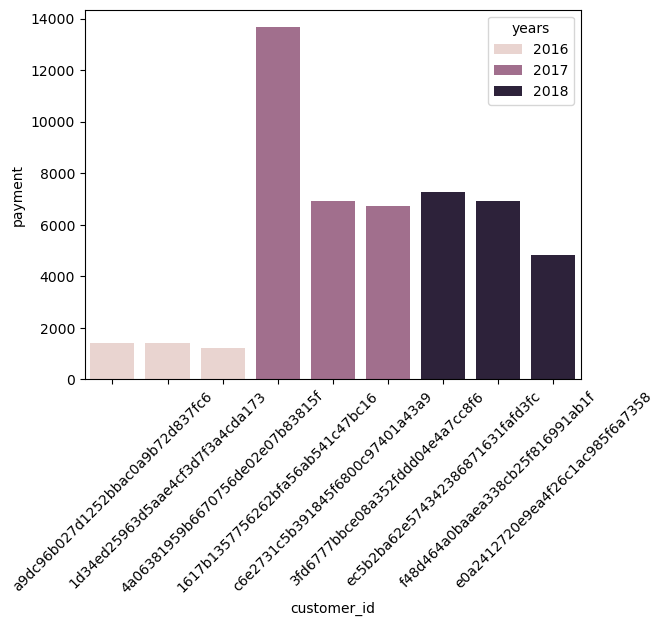

In [119]:
sns.barplot(x = "customer_id", y ="payment", data = df, hue = "years")
plt.xticks(rotation = 45)
plt.show